In [22]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

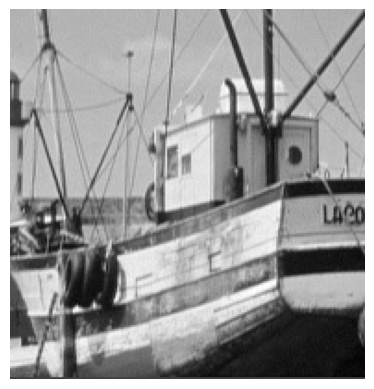

In [23]:
# Display image in grapy scale
image_path = '../data/fishing_boat.bmp'
image = Image.open(image_path).convert('L')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

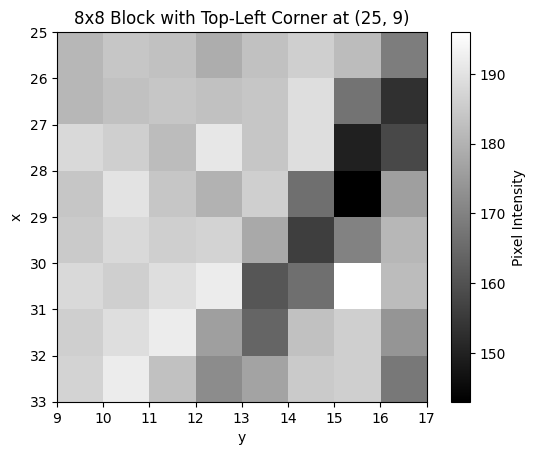

In [24]:
# Display the 8x8 block with the top-left pixel at (x, y) = (x*, y*)
x_star = 8 * (4-1) + 1
y_star = 8 * (2-1) + 1

# Get the 8x8 block
block_size = 8
x_start = x_star - 1
y_start = y_star - 1

# Convert the image to a numpy array
image_array = np.array(image)

# Get the block end coordinates
x_end = min(x_start + block_size, image_array.shape[0])
y_end = min(y_start + block_size, image_array.shape[1])
block = image_array[x_start:x_end, y_start:y_end]

# Display the 8x8 block
plt.imshow(block, cmap='gray', extent=(y_star, y_star + block_size, x_star + block_size, x_star))
plt.title(f"8x8 Block with Top-Left Corner at ({x_star}, {y_star})")
plt.xlabel("y")
plt.ylabel("x")
plt.colorbar(label="Pixel Intensity")
plt.show()

In [25]:
# Display the 8x8 block with a value of S
def display_sensed(S):
    # Generate the mask
    np.random.seed(42)
    total_pixels = block_size * block_size
    indices = np.random.choice(total_pixels, S, replace=False)
    
    # Normalize the grayscale block to the range 0–255
    block_normalized = (block - block.min()) / (block.max() - block.min()) * 255
    block_normalized = block_normalized.astype(np.uint8)

    # Generate a mask and set missing pixel intensities to NaN
    mask = np.zeros((block_size, block_size), dtype=bool)
    for index in indices:
        row, col = divmod(index, block_size)
        mask[row, col] = True
        
    # Convert from grayscale to RGB
    rgb_block = np.stack([block_normalized] * 3, axis=-1)
        
    # Set the missing pixels to orange
    rgb_block[~mask] = [255, 165, 0]

    # nan_block = block.astype(float)
    # nan_block[~mask] = np.nan

    # Display the block with missing pixels
    plt.imshow(rgb_block, cmap='gray', extent=(y_star, y_star + block_size, x_star + block_size, x_star))
    plt.title("8x8 Block with Missing Pixels with S = " + str(S))
    plt.colorbar(label="Pixel Intensity")
    plt.axis('off')
    plt.show()

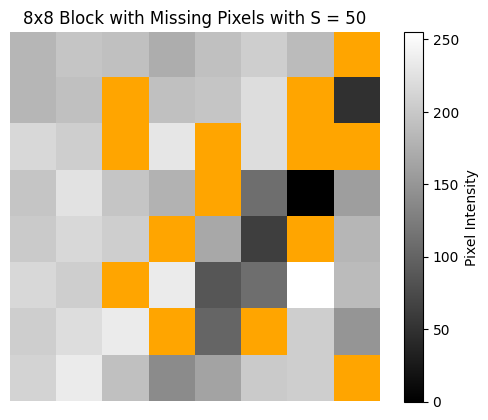

In [26]:
# S = 50
display_sensed(50)

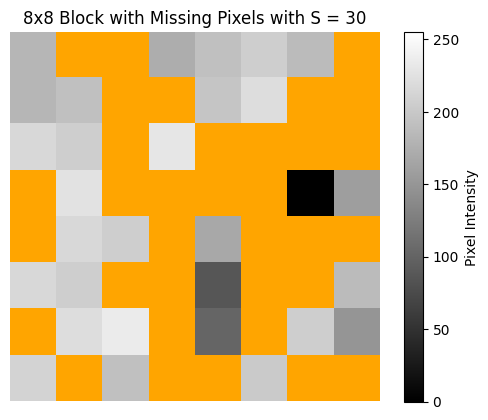

In [27]:
# S = 30
display_sensed(30)

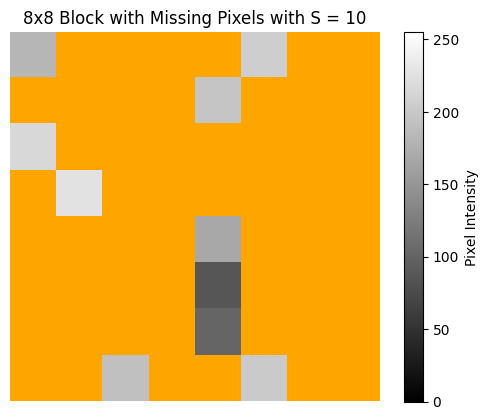

In [28]:
# S = 10
display_sensed(10)